# Step 1

Основные понятия  по теме дерево решений:
* Entropy and Information gain (https://www.youtube.com/watch?v=IPkRVpXtbdY)
* Train / test split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* K-fold cross-validation (https://scikit-learn.org/stable/modules/cross_validation.html)
* Hyper parameters and Grid search (https://scikit-learn.org/stable/modules/grid_search.html)

Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделения, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете _Information gain_. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

# Step 2

Начнём с простого - создайте Decision Tree (https://scikit-learn.org/stable/modules/tree.html) классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

У дерева должны быть следующие параметры:
* максимальная глубина - 5 уровней
* минимальное число образцов в вершине для разделения - 5

Подробнее узнать об имеющихся параметрах Decision Tree можно узнать в документации (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Step 3

Скачайте набор данных (data/train_data_tree.csv) с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) на этих данных, используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/train_data_tree.csv')
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [3]:
from sklearn.model_selection import train_test_split

y = data[['num']]
X = data.drop(['num'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf_tree = DecisionTreeClassifier(criterion='entropy')

In [39]:
clf_tree.fit(X, y)

DecisionTreeClassifier()

In [7]:
import math 

def entropy(n1, n2):
    if (n1 == 0) or (n2 == 0):
        return 0
    else:
        return (-(n1/(n1+n2)) * math.log2((n1/(n1+ n2)))) - (-(n2/(n1+n2)) * math.log2((n2/(n1+ n2))))
    
def information_gain(n1, n2, n3, n4):
    en1 = entropy(n1, n2)
    en2 = entropy(n3, n4)
    
    entropy_y = entropy(n1 + n2, n3 + n4)
    entropy_y_x = (((n1 + n2) / (n1 + n2 + n3 + n4)) * en1) + (((n3 + n4) / (n1 + n2 + n3 + n4)) * en2)
    
    return entropy_y - entropy_y_x

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

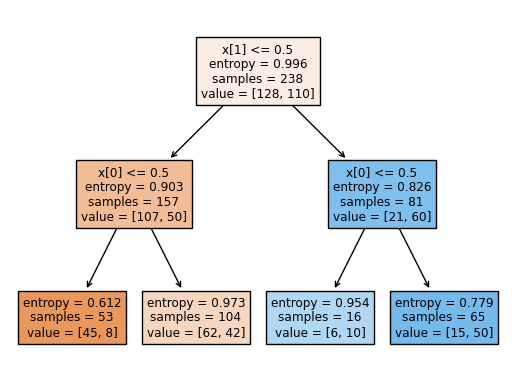

In [25]:
from sklearn import tree
tree.plot_tree(clf_tree, filled=True)

In [31]:
0.996 - (((128/238)*0.903) + (110/238)*0.826) # (128*0.903 + 110*0.826)/238

0.12858823529411767

In [ ]:
0,996 - (157/238)*0,903 - (81/238)*0,826 = 0,119

# Step 4

Photo test

# Step 5

photo test

# Step 6

Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)


# Step 7

photo test

# Step 8

photo test

# Step 9

Существуют различные способы вызова кросс-валидации в sklearn, например

cross_val_predict(estimator, x, y, cv=bar)
где estimator - предсказывающая модель, а bar - число блоков при k-fold кросс-валидации или объект из sklearn.model_selection, позволяющий осуществлять кросс-валидацию по другой стратегии.
Мы будем использовать другой способ - GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), отбирающий лучшую модель по заданным параметрам, проводя кросс-валидацию.

# Step 10

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.

Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
* максимальная глубина - от 1 до 10 уровней
* минимальное число проб для разделения - от 2 до 10
* минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
parameters = {'max_depth' : range(1, 10), 'min_samples_split' : range(2, 10), 'min_samples_leaf' : range(1, 10)}
clf_tree = DecisionTreeClassifier()
search = GridSearchCV(clf_tree, parameters, cv=5)
search.fit(X, y)
best_tree = search.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)


# Step 11

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь (https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

parameters = {'max_depth' : range(1, 10), 'min_samples_split' : range(2, 10), 'min_samples_leaf' : range(1, 10)}
clf_tree = DecisionTreeClassifier()
search = RandomizedSearchCV(clf_tree, parameters, cv=5)
search.fit(X, y)
best_tree = search.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=8, min_samples_split=8)


# Step 12

Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

    train - размеченный с известными правильным ответами (хранятся в колонке y)
    test - набор, где нужно предсказать их
Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y = train[['y']]
X = train.drop(['y'], axis=1)

parameters = {'max_depth' : range(1, 10), 'min_samples_split' : range(2, 10), 'min_samples_leaf' : range(1, 10)}
clf_tree = DecisionTreeClassifier()
search = GridSearchCV(clf_tree, parameters, cv=5)
search.fit(X, y)
best_tree = search.best_estimator_
predictions = best_tree.predict(test)

# Step 13

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) и поместите её в переменную conf_matrix.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, predictions)

# Step 14

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y = train[['y']]
X = train.drop(['y'], axis=1)

parameters = {'max_depth' : range(1, 10), 'min_samples_split' : range(2, 10), 'min_samples_leaf' : range(1, 10)}
clf_tree = DecisionTreeClassifier()
search = GridSearchCV(clf_tree, parameters, cv=5)
search.fit(X, y)
best_tree = search.best_estimator_
predictions = best_tree.predict(test)

photo test